HOW MUCH RED PAINT DOES IT TAKE TO BE FUNNIER THAN SOUND?

In [3]:
#INSPECT DATA
from module.core import  HPLC
data = HPLC('TCB2').df
data
# data.regions.unique() 

Invalid regions: {'M', 'Am', 'Y', 'SL6', 'SL1', 'CE', 'DG', 'SR6', 'V', 'SR1', 'CC'}
CREATED AND CACHED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/raw_hplc.pkl


Calculating ratios: 100%|██████████| 850048/850048 [00:46<00:00, 18457.59ratio/s]


CREATED AND CACHED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/hplc.pkl


,mouse_id,group_id,value,compound,region
0,2,1,86.863115,ASP,OF
1,5,1,74.158792,ASP,OF
2,7,1,124.972338,ASP,OF
3,8,4,146.541504,ASP,OF
4,9,1,179.331125,ASP,OF
...,...,...,...,...,...
891770,70,4,15.717876,5HT/DOPAC,HY
891771,70,4,5.529584,5HT/5HTP,HY
891772,70,4,2.925268,5HT/DA,HY
891773,70,4,1.859482,5HT/5HIAA,HY


In [ ]:
#INSPECT OUTLIERS

# data = Outliers('TCB2').df # Outlier_status : normal / suspected / kept / excluded
# data.select(outlier_status = 'suspected', compound='NA')

In [21]:
#INSPECT DATA
from module.core import Statistics, ProjectInformation, HPLC, Outliers, QuantitativeStatistic
from module.core.Constants import * #COMPOUNDS.list

statistic = QuantitativeStatistic.calculate(project="TCB2", experiment="agonist antagonist", compound="5HT").select(fully_significant=True)


stats = Statistics("TCB2") 
# stats.select(fully_significant=True, compound=COMPOUND_CLASSES['monoamines'], experiment="agonist antagonist",  significant_pair=('3mg/kg TCB', 'TCB2+MDL'))
# stats.select(significant_pair=('0,2mg/kg MDL', 'vehicles'), compound=COMPOUND_CLASSES['monoamines'])
# stats.select (compound = '5HIAA/5HT', test = 'two_way_anova', region = 'DM').result




,p_value,is_significant,result,test,p_value_threshold,project,experiment,compound,region,fully_significant
0,0.046,True,Source SS DF MS F p-u...,two_way_anova,0.05,TCB2,agonist antagonist,5HIAA/5HT,DM,True
0,0.009,True,Source SS DF MS F p-...,two_way_anova,0.05,TCB2,agonist antagonist,5HIAA/5HT,IC,True
0,0.015,True,Source SS DF MS F p...,two_way_anova,0.05,TCB2,agonist antagonist,5HIAA/5HT,S1L,True
0,0.047,True,Source SS DF MS F p-u...,two_way_anova,0.05,TCB2,agonist antagonist,5HIAA/5HT,VTA,True
0,0.013,True,Source SS DF MS F p-u...,two_way_anova,0.05,TCB2,agonist antagonist,5HIAA/5HT,vH,True


In [6]:
#INSPECT PROJECT PRAMS
from module.core import Project, ExperimentInformation, TreatmentInformation, Palette

data = TreatmentInformation('TCB2')
# data.select(label="vehicles")
# data.open()

Palette("TCB2").open()

# TCB2 to publish regions ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]
# TCB2 to excluded: IC , S1L6L, S1L6R

In [5]:
legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]
high_DA = ['A','NAc', 'VM', 'DM', 'VL', 'DL', 'VTA']
low_DA = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","dH","vH","MD","VPL","VPR","DLG","HY","SC","SN","DR","MR","CB"]



DA_high_sig = ['A','NAc', 'MD', 'HY'] #CROP 4 FIG
DA_low_sig = ["PL","aCC","S1L","S1R","DLG","HY","SC","DR"]
DOPAC_DA_sig = ["PL","aCC", "S1R","DM","DLG","CB"]
toiMT_DA_sig = ["NAc","VM","DM","VL","DL"]
HVA_DA_sig = ["dH", "HY", "SC","CB", "VTA"] #VTA sig two way agg antag 

NA_sig= ['aCC','vH', 'NAc','VPR','HY', 'SC', 'SN','VTA'] #VMA/NA in DLG add vH too for summary style / agg_ant ["aCC", "vH"]
VMA_NA_sig = ['DLG']

from module.core.Figure import Histogram
hist = Histogram('TCB2', 
                experiment='agonist antagonist', 
                compound="NA", 
                region= ["aCC", "vH", "NAc", "VPR"], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"fig_width": 20},  # fixed fig with bar width vaires 
                custom_params={"ylabel_x": -0.2},
                )

# Histogram('TCB2', experiment="dose response", compound="5HIAA/5HT", region=None, from_scratch=True, remove_outliers=True)
# Histogram('TCB2', compound="5HIAA/5HT", region=['CE'], from_scratch=True, handle_outliers=False)
# Histogram('TCB2', compound="5HIAA/5HT", region=['CE'], from_scratch=True)
# Histogram('TCB2', compound="5HIAA/5HT", from_scratch=True)

# hist.statistics.select( test = 'tukey').result

KeyError: '3mg/kg TCB'

Processing: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in ['aCC', 'OF', 'PL', 'M1'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in ['aCC', 'OF', 'PL', 'M1'].svg


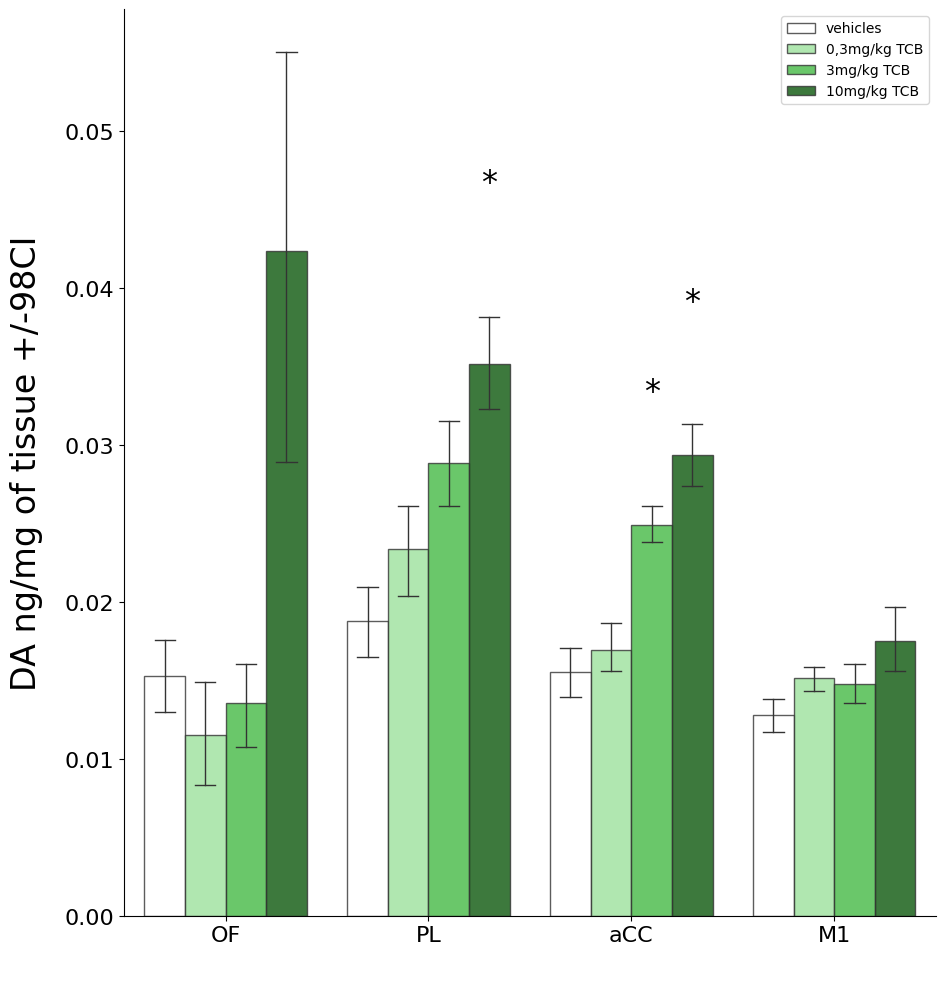

In [3]:
hist = Histogram('TCB2', 
                experiment='dose response', 
                compound="DA", 
                region= ["aCC", "OF", "PL", "M1"], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"ylabel_x": -0.1}
                )


In [3]:
hist.statistics#.select(region='OF')


AttributeError: 'Histogram' object has no attribute 'statistics'

In [2]:
project.statistics_information.dict

{'outlier_test': 'grubbs', 'p_value_threshold': 0.05}

In [3]:
project.raw_data.df

,mouse_id,group_id,ASP_OF,GLU_OF,ASPN_OF,HIS_OF,LSER_OF,GLN_OF,ARG_OF,GLY_OF,...,5HT_MR,LDOPA_CE,NA_CE,A_CE,5HTP_CE,DOPAC_CE,DA_CE,5HIAA_CE,HVA_CE,5HT_CE
0,2,1,86.863115,509.836736,2.842720,7.785802,37.902285,128.233720,7.214383,24.178042,...,0.022033,0.045390,0.164421,0.000313,0.013123,0.014084,0.012417,0.048235,0.016466,0.022511
1,5,1,74.158792,467.005051,3.020007,8.444727,36.401586,128.129822,7.681061,27.414000,...,0.074844,0.038754,0.134833,0.000221,0.015873,0.010778,0.011443,0.045002,0.012042,0.031541
2,7,1,124.972338,813.774972,3.689289,13.215553,61.455629,248.367590,13.113552,47.415710,...,0.234739,0.097392,0.310672,0.000266,0.002426,0.029662,0.061229,0.095586,0.037359,0.057737
3,8,4,146.541504,1167.559174,5.708628,13.917793,83.876415,364.297803,14.051519,67.226666,...,0.328171,0.068454,0.327469,0.000249,0.000922,0.024112,0.135931,0.098349,0.048807,0.127839
4,9,1,179.331125,1371.146048,6.213001,14.395083,73.358036,391.164424,14.598209,62.559148,...,0.303590,0.086053,0.360884,0.000288,0.001106,0.027306,0.031998,0.058006,0.022950,0.050614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,66,6,206.005089,1271.479564,11.852756,22.230273,101.706541,347.817481,20.478029,65.068112,...,0.329368,0.094532,0.366373,0.000233,0.013961,0.021833,0.029460,0.108463,0.031364,0.066857
60,67,1,218.083695,1278.997754,6.951781,25.233024,76.519190,772.268068,24.770000,68.337425,...,0.639348,0.104641,0.462209,0.000892,0.005068,0.039370,0.056497,0.142925,0.108481,0.068020
61,68,4,229.585497,1535.212131,6.941032,17.752890,83.589265,438.067068,14.773625,65.267767,...,0.449758,0.132527,0.328261,0.000338,0.003688,0.019629,0.013838,0.050575,0.024151,0.067074
62,69,6,172.124193,1220.687771,4.851575,12.808710,68.739739,385.489183,15.614281,57.566068,...,0.569673,0.064220,0.374777,0.000246,0.000917,0.027184,0.015593,0.069425,0.024708,0.062507


In [4]:
project.hplc.df

,mouse_id,group_id,value,compound,region
0,2,1,86.863115,ASP,OF
1,5,1,74.158792,ASP,OF
2,7,1,124.972338,ASP,OF
3,8,4,146.541504,ASP,OF
4,9,1,179.331125,ASP,OF
...,...,...,...,...,...
891770,70,4,15.717876,5HT/DOPAC,Y
891771,70,4,5.529584,5HT/5HTP,Y
891772,70,4,2.925268,5HT/DA,Y
891773,70,4,1.859482,5HT/5HIAA,Y


In [5]:
project.outliers.df

,mouse_id,group_id,value,compound,region,is_outlier
32064,2,1,0.014572,3MT,Am,False
32065,5,1,0.009620,3MT,Am,False
32066,7,1,0.008661,3MT,Am,False
32068,9,1,0.098045,3MT,Am,True
32070,11,1,NaN,3MT,Am,True
...,...,...,...,...,...,...
671165,52,6,0.118769,VMA/TYR,VPR,False
674069,58,6,0.094682,VMA/TYR,VPR,False
675521,61,6,0.121228,VMA/TYR,VPR,False
677941,66,6,0.081723,VMA/TYR,VPR,False


In [6]:
project.experiment_information.df

,Unnamed: 0,experiment,groups,independant_variables,paired,parametric
0,0,agonist antagonist,"1, 5, 3, 4","TCB2, MDL",False,True


In [7]:
project.treatment_information.df

,Unnamed: 0,group_id,treatment,color,independant_variables
0,0,1,vehicles,white,
1,1,5,MDL,pink,MDL
2,2,3,TCB2,orange,TCB2
3,3,4,TCB2+MDL,red,"TCB2, MDL"


In [9]:
project.statistics.df
project.statistics.significant_tests
project.statistics.significant_results
project.statistics.insufficent_data

,region,compound,test,is_significant,result,p_value_threshold,p_value
0,SJ,3MT,validation,False,Not enough data,0.05,None
1,SL1,3MT,validation,False,Not enough data,0.05,None
2,VPL,3MT,validation,False,Not enough data,0.05,None
3,dH,3MT,validation,False,Not enough data,0.05,None
4,SJ,3MT/5HIAA,validation,False,Not enough data,0.05,None
...,...,...,...,...,...,...,...
39004,CC,VMA/TYR,one_way_anova,False,F p_value 0 1.224452 0.319248,0.05,0.319248
39005,CC,VMA/TYR,tukey,False,group1 group2 meandiff p-adj lowe...,0.05,"[[], []]"
39006,VPR,VMA/TYR,two_way_anova,False,Source SS DF MS F p-un...,0.05,0.269
39007,VPR,VMA/TYR,one_way_anova,False,F p_value 0 1.340131 0.277097,0.05,0.277097
